In [1]:
import os
import scanpy as sc
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix, csr_matrix
from scipy.spatial import Delaunay
import numpy as np
import pygsp as pg
import matplotlib as mpl

In [2]:
figpath = '/stanley/WangLab/kamal/figures/projects/manifesto/gsp_schematic_human_lymph_node/'
os.makedirs(figpath, exist_ok=True)
dpi = 500

# Load eigendecomposed adata from cluster

In [4]:
adata = sc.read_h5ad('/stanley/WangLab/kamal/data/technologies/xenium/human_lymph_node/gsp_schematic/adata.h5ad')

# Plot mesh

In [5]:
# tdata = sc.pp.subsample(adata, 0.075, copy=True, random_state=1)
# tdata

## Remove stragglers

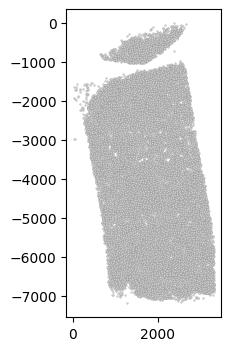

In [6]:
points = adata.obsm['spatial']
plt.figure(figsize=(2,4))
plt.scatter(points[:,0], points[:,1], edgecolor='k', linewidth=0.04, s=2, color=[0.8]*3)
plt.show()

In [8]:
leftx = tdata.obsm['spatial'][:,0] < 200
lefty = tdata.obsm['spatial'][:,1] < -3500
tdata = tdata[~(leftx & lefty)]

In [ ]:
rightx = tdata.obsm['spatial'][:,0] > 3200
righty = tdata.obsm['spatial'][:,1] > -4000
tdata = tdata[~(rightx & righty)]

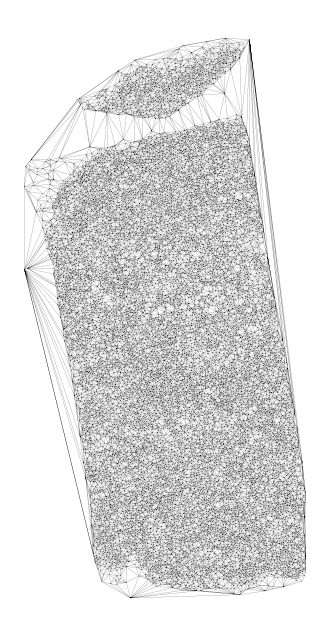

In [11]:
color = [1]*3

points = adata.obsm['spatial']
plt.figure(figsize=(4,8))
plt.triplot(points[:,0], points[:,1], color='k', linewidth=0.1)
plt.scatter(points[:,0], points[:,1], edgecolor='k', linewidth=0.02, s=0.2, color=color)
plt.axis('off')
filename = os.path.join(figpath, 'triangulation.png')
plt.savefig(filename, dpi=300)
plt.show()

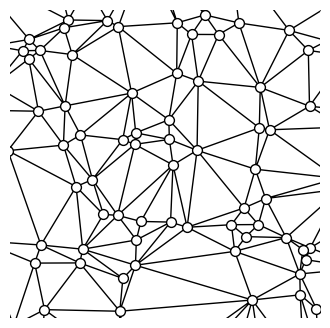

In [25]:
color = [1]*3

points = adata.obsm['spatial']
plt.figure(figsize=(4,4))
plt.triplot(points[:,0], points[:,1], color='k', linewidth=1)
plt.scatter(points[:,0], points[:,1], edgecolor='k', linewidth=1, s=50, color=color)
plt.axis('off')
plt.xlim(2950,3100)
plt.ylim(-5950,-6100)
filename = os.path.join(figpath, 'triangulation_zoom.png')
plt.savefig(filename, dpi=300)
plt.show()

# Frequency basis

In [9]:
def delaunay(coords): 

    tri = Delaunay(coords)
    n_cells = len(coords)
    A = lil_matrix((n_cells,n_cells), dtype=float)
    for simplex in tri.simplices: 
        for i in range(len(simplex)): 
            for j in range(len(simplex)): 
                A[simplex[i],simplex[j]] = 1 

    A = csr_matrix(A)
    A.setdiag(0)

    return A

In [15]:
# adata = tdata.copy()

In [8]:
adata

AnnData object with n_obs × n_vars = 28346 × 377
    obs: 'transcript_counts', 'n_genes', 'w'
    var: 'n_cells'
    uns: 'log1p'
    obsm: 'V', 'spatial'
    layers: 'highpass', 'lowpass'

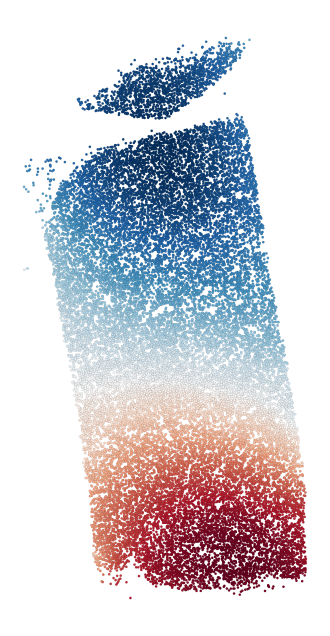

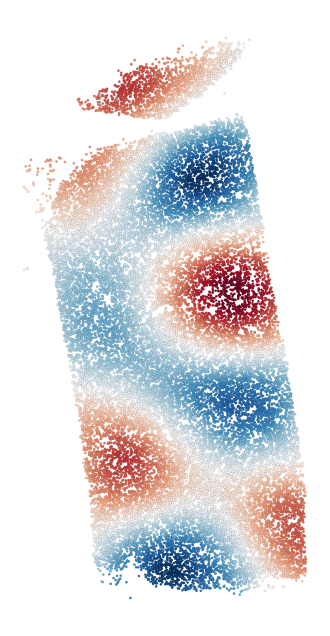

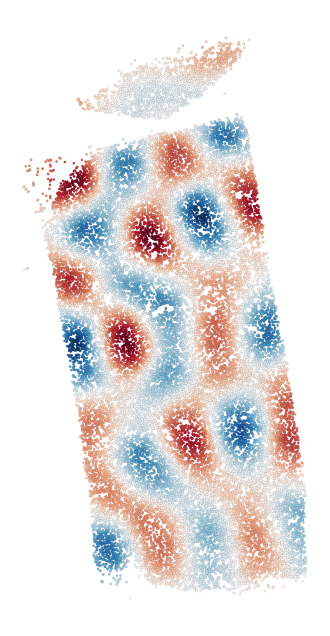

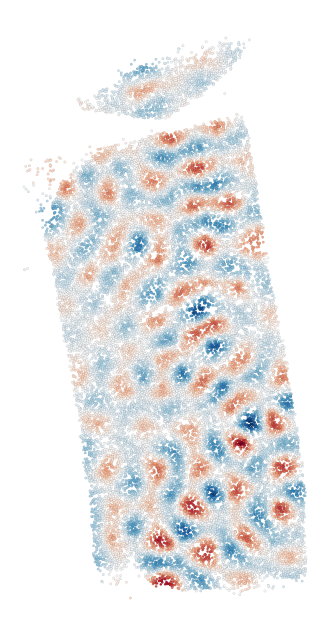

In [13]:
freq_idxs = [1, 10, 43, 200]

for i in freq_idxs:
    points = adata.obsm['spatial']
    plt.figure(figsize=(4,8))
    plt.scatter(
        points[:,0],
        points[:,1],
        edgecolor='k',
        linewidth=0.04,
        s=3,
        c=adata.obsm['V'][:,i],
        cmap='RdBu'
    )
    plt.axis('off')
    filename = os.path.join(figpath, f'frequency_{i}.png')
    plt.savefig(filename, dpi=300)
    plt.show()

# Filtering

In [6]:
def delaunay(coords): 

    tri = Delaunay(coords)
    n_cells = len(coords)
    A = lil_matrix((n_cells,n_cells), dtype=float)
    for simplex in tri.simplices: 
        for i in range(len(simplex)): 
            for j in range(len(simplex)): 
                A[simplex[i],simplex[j]] = 1 

    A = csr_matrix(A)
    A.setdiag(0)

    return A

In [7]:
adata = sc.read_h5ad('/stanley/WangLab/kamal/data/technologies/xenium/human_lymph_node/filtered/adata.h5ad')
adata.obsm['spatial'][:,1] *= -1

In [8]:
points = adata.obsm['spatial']
A = delaunay(points)
G = pg.graphs.Graph(A)
G.estimate_lmax()

In [24]:
gene = 'TRAC'
tau = 5

x = np.array(adata[:,gene].X.todense()).flatten()
g = pg.filters.Heat(G, tau)
x_ = g.filter(x)

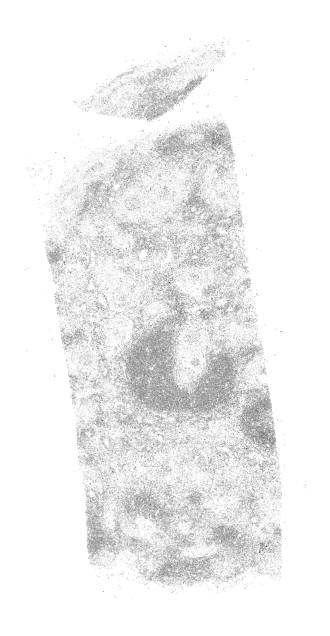

In [23]:
gene = 'TRAC'
points = adata.obsm['spatial']
plt.figure(figsize=(4,8))
plt.scatter(
    points[:,0],
    points[:,1],
    # edgecolor='k',
    linewidth=0.00,
    s=0.5,
    c=x,
    cmap='Greys',
)
plt.axis('off')
filename = os.path.join(figpath, f'{gene}_before_greys.png')
plt.savefig(filename, dpi=dpi)
plt.show()

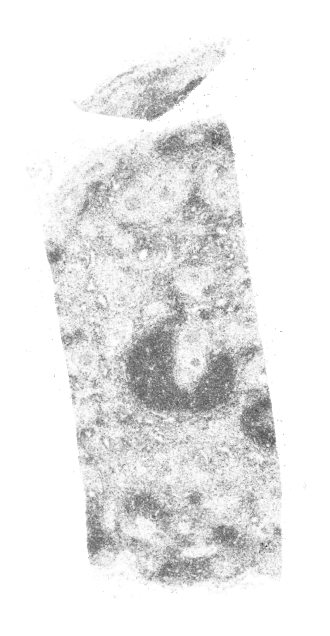

In [25]:
gene = 'TRAC'
points = adata.obsm['spatial']
plt.figure(figsize=(4,8))
plt.scatter(
    points[:,0],
    points[:,1],
    # edgecolor='k',
    linewidth=0.00,
    s=0.5,
    c=x_,
    cmap='Greys',
)
plt.axis('off')
filename = os.path.join(figpath, f'{gene}_after_greys.png')
plt.savefig(filename, dpi=dpi)
plt.show()

Note: the above was **not scaled/clipped**.

The final figure was, however, scaled/clipped.

See the results from region analysis (i.e. notebook corresponding to Fig. 3)

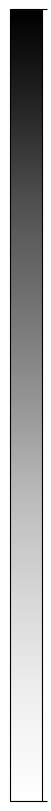

In [8]:
fig, ax = plt.subplots(figsize=(0.4,8), layout='constrained')

cmap = mpl.cm.Greys
norm = None

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='vertical', label='')

plt.grid(None)
plt.gca().set_yticks(np.arange(0,1.1,1), ['']*2)

figname = 'expression_colorbar_greys.png'
savepath = os.path.join(figpath, figname)
plt.savefig(savepath, dpi=dpi)

In [14]:
adata_subsample = sc.read_h5ad('/stanley/WangLab/kamal/data/technologies/xenium/human_lymph_node/gsp_schematic/adata.h5ad')

In [16]:
points = adata_subsample.obsm['spatial']
A = delaunay(points)
G = pg.graphs.Graph(A)
G.estimate_lmax()

In [17]:
gene = 'TRAC'
tau = 20

x = np.array(adata_subsample[:,gene].X.todense()).flatten()
g = pg.filters.Heat(G, tau)
x_ = g.filter(x)

In [18]:
spectrum = adata_subsample.obsm['V'].T @ x

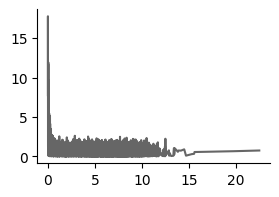

In [19]:
# color = '#C92127'
color = [0.4]*3

plt.figure(figsize=(3,2))
plt.plot(adata_subsample.obs['w'][1:], np.abs(spectrum)[1:], color=color)
plt.gca().spines[['top','right']].set_visible(False)
figname = f'spectrum_{gene}.png'
savepath = os.path.join(figpath, figname)
plt.savefig(savepath, dpi=dpi)
plt.show()

In [20]:
kernel = np.exp(-tau*adata_subsample.obs['w'][1:])
# kernel = np.exp(-tau*adata.obs['w'])

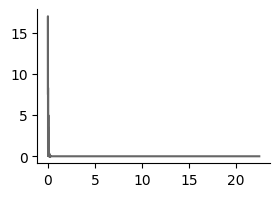

In [21]:
plt.figure(figsize=(3,2))
plt.plot(adata_subsample.obs['w'][1:], kernel*np.abs(spectrum)[1:], color=color)
plt.gca().spines[['top','right']].set_visible(False)
figname = f'modified_spectrum_{gene}.png'
savepath = os.path.join(figpath, figname)
plt.savefig(savepath, dpi=dpi)
plt.show()